In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from classes.AndersonGraph import AndersonGraph
from plotting import plot_lattice_pdf
from animations import animate_lattice_pdf, animate_random_graph_pdf
from plot_ipr import plot_ipr_evolution, plot_ipr_vs_W, plot_ipr_vs_p 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Time Evolution & Anderson Localizaton on Graphs

## 1D Periodic Lattice (Ring)

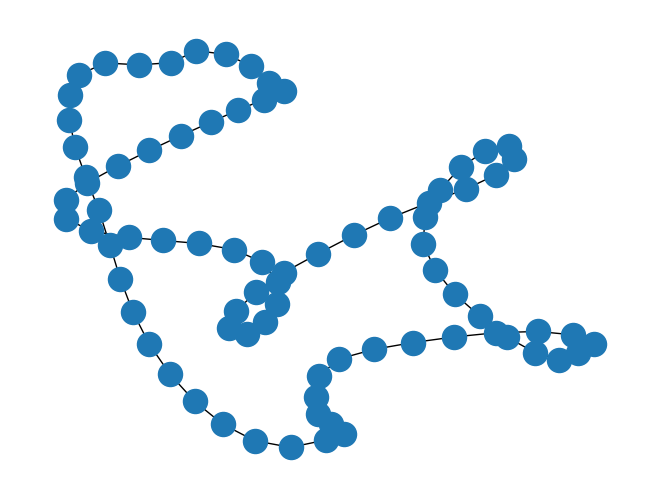

In [5]:
n = 80
psi_0 = np.zeros(n)
psi_0[n//2] = 1

ring = nx.grid_graph(dim=[80], periodic=True)
nx.draw(ring)

anderson_ring = AndersonGraph(graph=ring, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

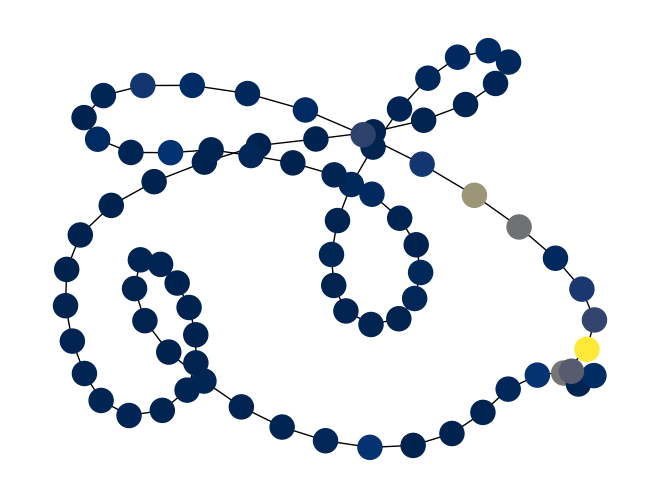

In [6]:
anderson_ring.plot_density(t=17)

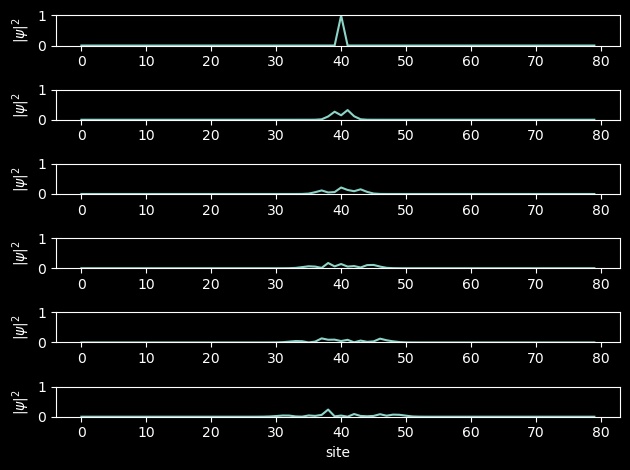

In [12]:
# plot the ring PDF as snapshots in time
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    psi_t = anderson_ring.psi_at_t(i)
    density = np.real(np.multiply(psi_t.conj(), psi_t))
    ax.plot(density)
    
    ax.set_ylim(0, 1)
    ax.set_ylabel('$|\psi|^2$')


plt.xlabel('site')
plt.tight_layout()

## 2D Periodic Lattice (Torus)

In [22]:
n = 30
lattice = nx.grid_graph(dim=(n, n), periodic=True)
psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

anderson_lattice = AndersonGraph(graph=lattice, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

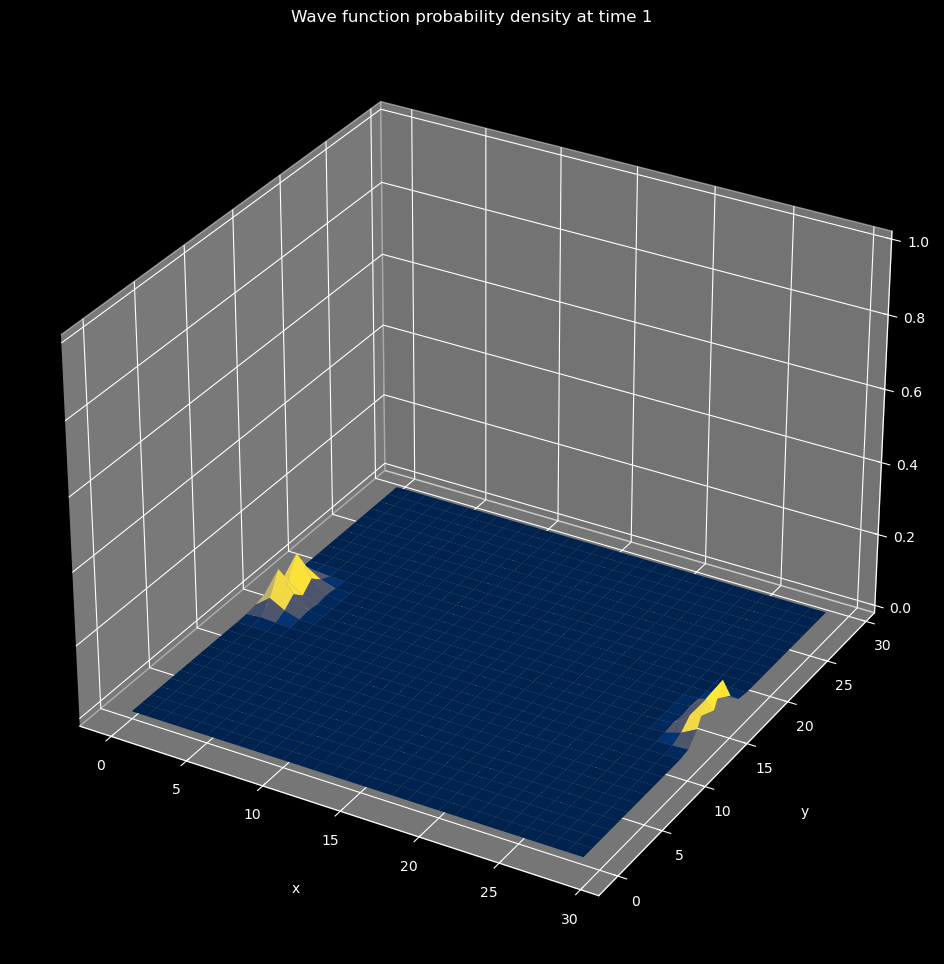

In [23]:
plot_lattice_pdf(anderson_lattice=anderson_lattice, time=1)

MovieWriter ffmpeg unavailable; using Pillow instead.


saving animation to plots/lattice_animation_size_30_tmax_20_W_1.gif


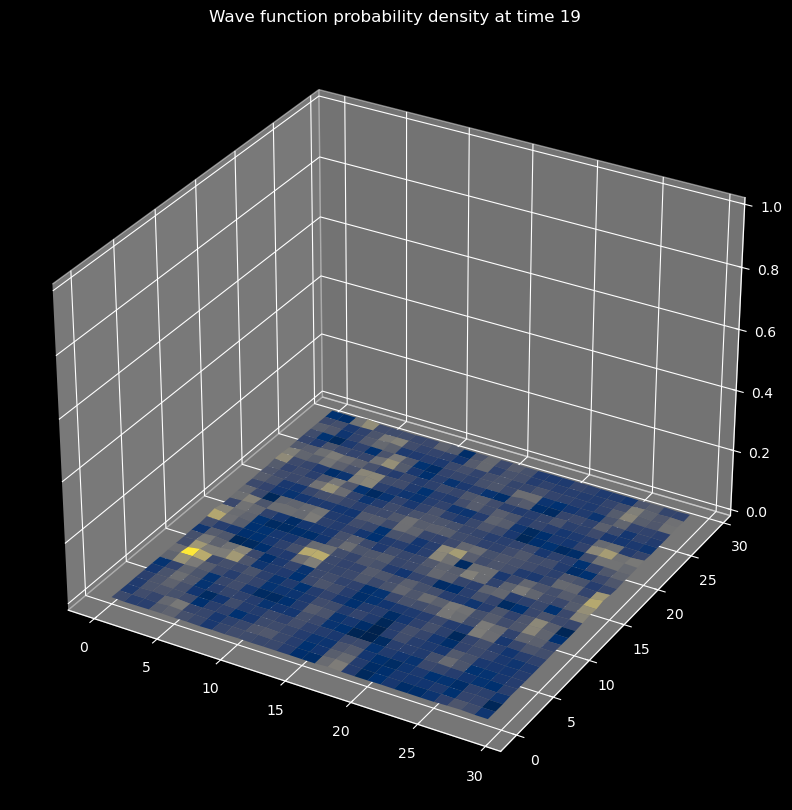

In [25]:
animate_lattice_pdf(anderson_lattice=anderson_lattice, t_max=20)

## Random Graphs

MovieWriter ffmpeg unavailable; using Pillow instead.


saving animation to plots/random_graph_animation_n_100_tmax_40_W_1_p_0.03.gif


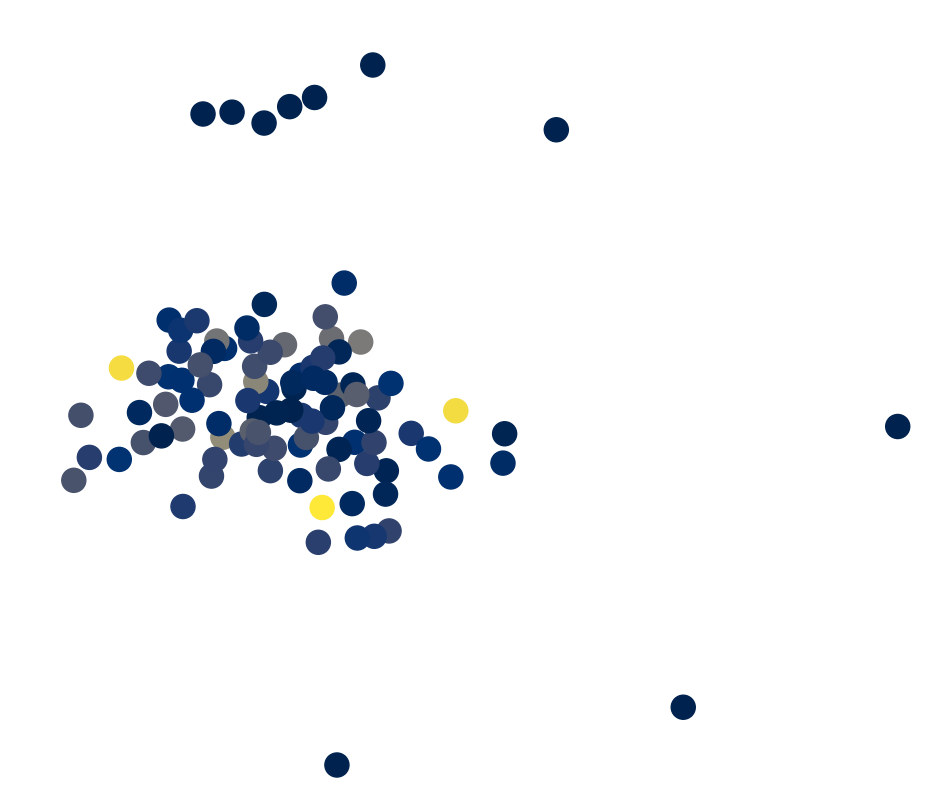

In [34]:
n = 100
psi_0 = np.zeros(n)
psi_0[np.random.randint(n)] = 1

p = 0.03
random_graph = nx.erdos_renyi_graph(n, p)

anderson_random_graph = AndersonGraph(graph=random_graph, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

animate_random_graph_pdf(anderson_random_graph=anderson_random_graph, t_max=40, p=p)

# IPR Plots

## 1D Periodic Lattice (Ring)

## 2D Periodic Lattice (Torus)

## Random Graphs